In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = './input/cat-and-dog/training_set'

CATEGORIES = ["cats", "dogs"]

## Checking path

In [3]:
# importing os module
import os

isExist = os.path.exists(DATADIR)
print(isExist)

True


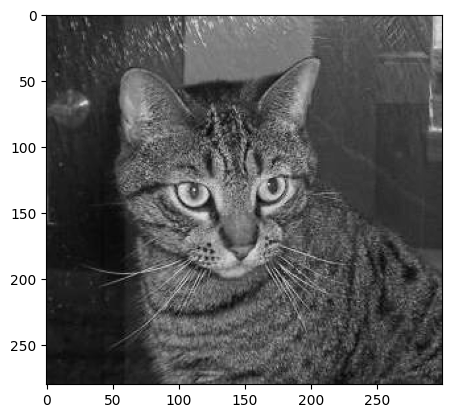

[[ 42  42  43 ... 201 196 195]
 [ 43  43  43 ... 197 193 191]
 [ 43  43  43 ... 193 192 192]
 ...
 [ 31  29  25 ...  26  33  49]
 [ 31  29  25 ...  32  36  47]
 [ 31  28  24 ...  41  34  32]]


In [4]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

print(img_array)

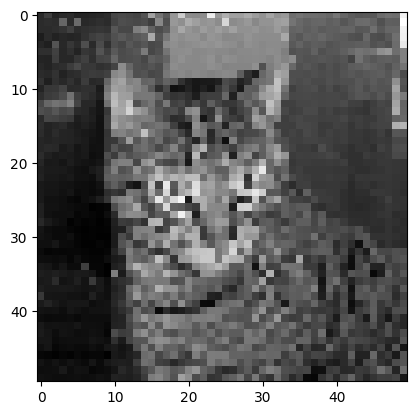

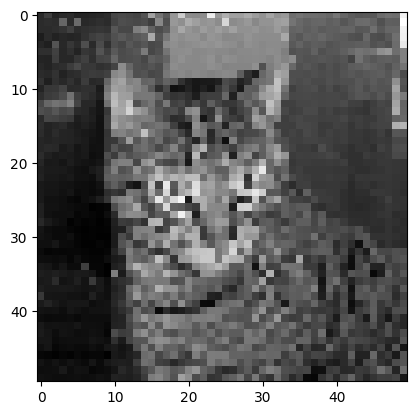

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
training_data = []

In [6]:
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 4006/4006 [00:05<00:00, 693.84it/s]

8005


In [11]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

0
1
1
1
1
0
0
1
1
1
[[[[115]
   [ 97]
   [120]
   ...
   [127]
   [143]
   [141]]

  [[135]
   [135]
   [137]
   ...
   [140]
   [138]
   [141]]

  [[147]
   [123]
   [144]
   ...
   [144]
   [128]
   [141]]

  ...

  [[217]
   [175]
   [224]
   ...
   [213]
   [209]
   [208]]

  [[221]
   [224]
   [231]
   ...
   [208]
   [212]
   [184]]

  [[216]
   [227]
   [194]
   ...
   [176]
   [208]
   [208]]]]


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)
dense_layers = [0]
layer_sizes = [64]
conv_layers = [4]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, 
                      y,
                      batch_size=32,
                      epochs=30,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('Cat_vs_Dog-CNN.model')



4-conv-64-nodes-0-dense-1679411959
Epoch 1/30
176/176 [==============================] - 60s 283ms/step - loss: 0.6887 - accuracy: 0.5286 - val_loss: 0.6715 - val_accuracy: 0.6145
Epoch 2/30
176/176 [==============================] - 43s 243ms/step - loss: 0.6668 - accuracy: 0.5900 - val_loss: 0.6475 - val_accuracy: 0.6311
Epoch 3/30
176/176 [==============================] - 43s 245ms/step - loss: 0.6414 - accuracy: 0.6352 - val_loss: 0.6273 - val_accuracy: 0.6478
Epoch 4/30
176/176 [==============================] - 44s 248ms/step - loss: 0.6009 - accuracy: 0.6771 - val_loss: 0.5793 - val_accuracy: 0.7119
Epoch 5/30
176/176 [==============================] - 46s 264ms/step - loss: 0.5479 - accuracy: 0.7157 - val_loss: 0.5871 - val_accuracy: 0.6973
Epoch 6/30
176/176 [==============================] - 45s 256ms/step - loss: 0.4970 - accuracy: 0.7617 - val_loss: 0.5604 - val_accuracy: 0.7169
Epoch 7/30
176/176 [==============================] - 44s 251ms/step - loss: 0.4583 - accuracy:

INFO:tensorflow:Assets written to: Cat_vs_Dog-CNN.model\assets


INFO:tensorflow:Assets written to: Cat_vs_Dog-CNN.model\assets


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [ ]:
pathCat = './input/cat-and-dog/test_set/cats/cat.4003.jpg'
# pathCat = './input/cat-and-dog/test_set/dogs/dog.4001.jpg'

pathCatExists = os.path.exists(pathCat)
print(pathCatExists)

In [ ]:
import cv2
import tensorflow as tf

CATEGORIES = ["Dog", "Cat"]


def prepare(filepath):
    print('predicting...')
    IMG_SIZE = 50  # 50 in txt-based

    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    
    if img_array is not None and img_array.size > 0:
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        cv2.imshow('Precdiction Image', img_array)
        cv2.waitKey()
        cv2.destroyAllWindows()
        return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    else:
        return None


model = tf.keras.models.load_model('Cat_vs_Dog-CNN.model')

# prediction = model.predict([prepare('./input/cat-and-dog/test_set/cats/cat.4003.jpg')])
prediction = model.predict([prepare(pathCat)])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

In [ ]:
import numpy as np
import os

test_data_path = './input/cat-and-dog/test_set'

# load test data
X_test = []
y_test = []
for category in CATEGORIES:
    path = os.path.join(test_data_path, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        X_test.append(new_array)
        y_test.append(class_num)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

# normalize the test data
X_test = X_test / 255.0

# evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print('Test accuracy:', accuracy)
print('Test loss:', loss)


In [ ]:
import cv2
import tensorflow as tf
import numpy as np

CATEGORIES = ["Dog", "Cat"]

def prepare(filepath):
    print('predicting...')
    IMG_SIZE = 50  # 50 in txt-based

    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    
    if img_array is not None and img_array.size > 0:
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        cv2.imshow('Prediction Image', img_array)
        cv2.waitKey()
        cv2.destroyAllWindows()
        return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    else:
        return None

model = tf.keras.models.load_model('Cat_vs_Dog-CNN.model')
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

pathCat = './input/cat-and-dog/test_set/cats/cat.4003.jpg'
# pathDog = './input/cat-and-dog/test_set/dogs/dog.4002.jpg'
X_test = prepare(pathCat)
if X_test is not None:
    # prediction = model.predict([X_test])
    # print(prediction)  # will be a list in a list.
    # print(CATEGORIES[int(prediction[0][0])])
    y_test = np.array([0])  # target value with shape (1,)
    score = model.evaluate(X_test, y_test)
    print(f'Accuracy: {score[1]}')
    print(f'Loss: {score[0]}')
    print(f'Prediction: {CATEGORIES[int(model.predict_classes(X_test)[0])]})')
else:
    print('Image could not be loaded.')


In [ ]:
import cv2
import tensorflow as tf
import numpy as np

CATEGORIES = ["Dog", "Cat"]

# def prepare(filepath):
#     print('predicting...')
#     IMG_SIZE = 50  # 50 in txt-based

#     img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    
#     if img_array is not None and img_array.size > 0:
#         new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#         cv2.imshow('Prediction Image', img_array)
#         cv2.waitKey()
#         cv2.destroyAllWindows()
#         return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1).squeeze()  # remove extra dimension using squeeze method
#     else:
#         return None

def prepare(filepath):
    print('predicting...')
    IMG_SIZE = 50  # 50 in txt-based

    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    
    if img_array is not None and img_array.size > 0:
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        cv2.imshow('Prediction Image', img_array)
        cv2.waitKey()
        cv2.destroyAllWindows()
        return new_array.reshape(IMG_SIZE, IMG_SIZE, 1) # remove the first dimension
    else:
        return None



model = tf.keras.models.load_model('Cat_vs_Dog-CNN.model')

pathCat = './input/cat-and-dog/test_set/cats/cat.4001.jpg'
X_test = np.array([prepare(pathCat)])
y_test = np.array([0])

if X_test is not None and y_test is not None:
    prediction = model.predict(X_test)
    print('Result: ', prediction)  # will be a list in a list.
    print('Result: ', CATEGORIES[int(prediction)])
    print(CATEGORIES[int(prediction.argmax())])
    score = model.evaluate(X_test, y_test)
    print(f'Accuracy: {score[1]}')
    print(f'Loss: {score[0]}')
else:
    print('Image could not be loaded.')


In [ ]:
import cv2
import tensorflow as tf
import numpy as np

CATEGORIES = ["Dog", "Cat"]

def prepare(filepath):
    print('predicting...')
    IMG_SIZE = 50

    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    if img_array is not None and img_array.size > 0:
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        cv2.imshow('Prediction Image', img_array)
        cv2.waitKey()
        cv2.destroyAllWindows()
        return new_array.reshape(IMG_SIZE, IMG_SIZE, 1)
    else:
        return None

model = tf.keras.models.load_model('Cat_vs_Dog-CNN.model')

pathCat = './input/cat-and-dog/test_set/cats/cat.4001.jpg'
X_test = np.array([prepare(pathCat)])
y_test = np.array([0])

if X_test is not None and y_test is not None:
    prediction = model.predict(X_test)[0]
    probabilities = tf.nn.softmax(prediction)
    print('Probabilities:')
    for i in range(len(CATEGORIES)):
        print(f'{CATEGORIES[i]}: {probabilities[i]*100:.2f}%')
    print('Result: ', CATEGORIES[int(prediction.argmax())])
    score = model.evaluate(X_test, y_test)
    print(f'Accuracy: {score[1]}')
    print(f'Loss: {score[0]}')
else:
    print('Image could not be loaded.')
